# RUN WITH PYTHON 3.11.5!!!!

In [3]:
import PyPDF2
import re
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
from gensim.models.tfidfmodel import TfidfModel
from gensim.corpora.dictionary import Dictionary

from icecream import ic

In [1]:
from nlp import tokenize
from nlp import get_topic_words
from nlp import get_top_words

SyntaxError: expected ':' (nlp.py, line 89)

In [2]:
harry_potter = tokenize('HarryPotterylaPiedraFilosofal.pdf', language = 'Spanish', doc_splitter = 'CAPÍTULO')

In [3]:
df = get_topic_words(harry_potter, language = 'Spanish', doc_splitter = 'CAPÍTULO')

In [9]:
df = get_topic_words('Dune by Frank Herbert.pdf', language = 'English', doc_splitter = '—from', num_topic_words = 20)

In [11]:
df = get_topic_words('The Hitchhiker_s Guide to the Galaxy.pdf', language = 'English', doc_splitter = 'Chapter', num_topic_words = 20)

In [4]:
df

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
Doc number,,,,,,,,,,
Doc 1,gato,dursley,niño,calle,taladros,mantas,moto,esquina,drive,privet
Doc 2,piers,dudley,vidrio,vernon,tía,petunia,serpiente,menudo,alacena,cocina
Doc 3,vernon,tío,dudley,cartas,petunia,bastón,tía,alacena,smeltings,carta
Doc 4,vernon,tío,irá,sofá,paraguas,lily,gigante,mago,misterio,salchichas
Doc 5,ollivander,griphook,tienda,monedas,tiendas,hagrid,duende,fénix,chorreante,centímetros
Doc 6,andén,ron,carrito,compartimiento,tren,ventanilla,nueve,cuartos,andenes,baúl
Doc 7,sombrero,percy,taburete,fantasma,ceremonia,selección,aplaudió,comido,decapitado,seleccionador
Doc 8,fang,snape,poción,bezoar,viernes,caldero,ron,acónito,ajenjo,ajo
Doc 9,trofeos,malfoy,escoba,recordadora,wood,peeves,neville,ron,filch,hooch


In [10]:
df

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19,Word 20
Doc number,,,,,,,,,,,,,,,,,,,,
Doc 1,piter,baron,feyd,globe,uncle,nephew,mentat,ambassador,impair,darling,perform,spinning,youth,rumbled,display,observe,fat,chuckle,efficient,standard
Doc 2,girl,poem,reverend,meditation,seagulls,submits,willow,dreamed,salvage,skinny,softened,jessica,haderach,kwisatz,tears,beach,dream,proctor,surf,choam
Doc 3,rapier,halleck,dummy,table,today,bodkin,stdrd,mood,kindjal,lad,hawat,scar,storms,countered,galacian,girls,pupil,sinister,skylights,weaponry
Doc 4,yueh,book,filmbook,filament,notches,shallower,torturing,wan,na,drooping,magnifier,page,terranic,table,pages,latitudes,favorite,beasts,lessons,northern
Doc 5,levies,stockpiling,choam,feint,prison,shipping,potential,salusa,supporting,mentat,landsraad,melange,endanger,warnings,tells,profits,formidable,heighliner,houses,sardaukar
Doc 6,mapes,dining,painting,hang,boxes,bull,manage,hall,shadout,entry,blade,jessica,dress,bodice,shuttle,cargo,chakobsa,rooms,sheathed,arched
Doc 7,wellington,wan,na,trees,yueh,window,feud,bookcases,deceit,malign,purpled,touches,slope,hate,busy,blinds,produces,riots,treasury,trickle
Doc 8,headboard,operator,seeker,bed,mountain,names,bookcase,closet,mapes,bush,pictures,debts,exploring,fish,gripping,immobility,mnemonic,wits,shadout,nowhere
Doc 9,leaf,airlock,mapes,lock,pad,seeker,dots,prop,cliffs,fountain,star,stem,message,palm,cairn,defection,roses,silos,oval,hall


In [12]:
df

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19,Word 20
Doc number,,,,,,,,,,,,,,,,,,,,
Doc 1,prosser,house,bulldozer,dent,mud,lie,flying,bypass,ford,b,janx,drivers,pub,arthur,point,saucers,shadow,stomped,often,prefect
Doc 2,pints,barman,alcohol,algolian,drink,sir,says,arsenal,qualactin,relaxant,santraginean,suntiger,wanly,ford,pub,beer,muscle,world,pan,groom
Doc 3,towel,barman,pa,somethings,pub,strag,notice,satchel,huge,every,signal,ford,sky,ships,prefect,yellow,hung,demolition,hitchhiker,noise
Doc 4,damogran,president,boat,beeblebrox,imperial,grinned,zaphod,water,cliff,eagle,globe,hooloovoo,island,meaningless,sea,presidential,sash,sofa,waves,power
Doc 5,vogon,dentrassis,vogons,mattresses,ford,hrung,match,lift,jeltz,cooks,dentrassi,book,prostetnic,prefect,arthur,betelgeuse,buzz,father,fleets,holding
Doc 6,howl,babel,gargle,existed,brainwave,fish,gone,harmless,column,nelson,hyperspace,says,jump,carrier,frequencies,load,outcry,unlucky,entry,mind
Doc 7,guard,vogon,ford,useless,hatchway,resistance,poem,prisoners,shouting,poetry,da,poet,whirred,er,arthur,throw,airlock,brightly,panicking,counterpoint
Doc 8,takes,begins,introduction,islington,telephone,travels,sol,journey,distances,amount,bethselamin,chemist,comforting,commemorated,compiled,confronted,contributions,countless,dizzying,editorships
Doc 9,southend,pavement,power,nothingth,ford,thousand,arthur,bulges,custard,drifting,measurement,penguin,poghril,patterns,improbability,falling,rescued,cubicle,voice,directions


In [ ]:
#Using Regular Expressions to Extract Names (This can be more efficient with Named Entity Recognition)
match_capitlized_words = '[A-Z]\w+'
capitalized_words = re.findall(match_capitlized_words, harry_potter)

In [ ]:
#Creating a dataframe with the most common capitalized words
#Also excluding stop words manually
df = pd.DataFrame(capitalized_words)
dfCounts = df.value_counts()
dfCounts = dfCounts.reset_index()
dfCounts = dfCounts.rename(columns={0:'Name'})
dfCounts = dfCounts[-dfCounts['Name'].isin(['No','El','La','Se','Pero','Los','Qué'])]
dfCounts = dfCounts[dfCounts['count']>=100]

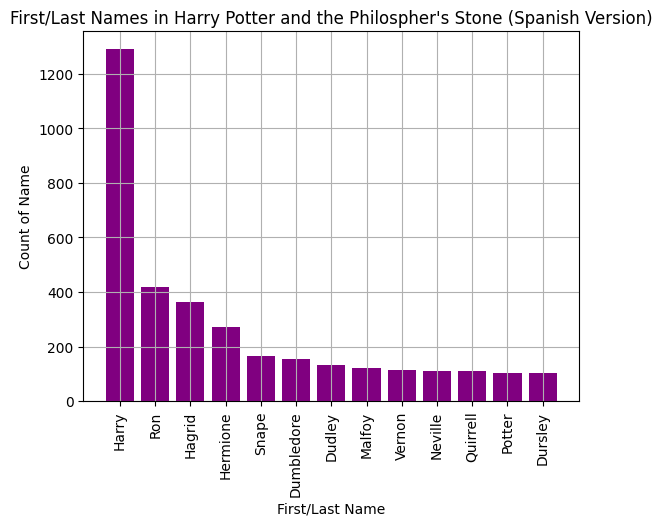

In [ ]:
#Creting a common names barplot
plt.bar(dfCounts['Name'], dfCounts['count'], color = 'purple')
plt.xticks(rotation = 90)
plt.ylabel('Count of Name')
plt.xlabel('First/Last Name')
plt.title("First/Last Names in Harry Potter and the Philospher's Stone (Spanish Version)")
plt.grid()
plt.savefig('frequent-names.png',dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
type([1,2,3]) == list

True

In [ ]:
#Splitting the document into chapters and getting metadata from the chapters
chapters = re.split('CAPÍTULO', harry_potter)[1:]
chapter_metadata = pd.DataFrame()
chapter_metadata['Character Length'] = pd.DataFrame([len(chapter) for chapter in chapters])
chapter_metadata.index+=1
#Word tokenizing each chapter
chapter_tokens = [word_tokenize(chapter) for chapter in chapters]
chapter_tokens = [[word.lower() for word in token if word.isalpha()] for token in chapter_tokens]
chapter_metadata['Number of Words'] = [len(token) for token in chapter_tokens]

#Sentence tokenizing
sent_tokens = [sent_tokenize(chapter) for chapter in chapters]
chapter_metadata['Number of Sentences'] = [len(token) for token in sent_tokens]

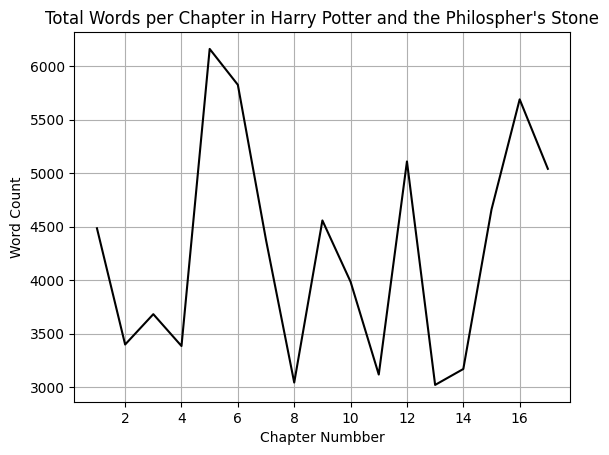

In [ ]:
#Creating a word count plot
plt.plot(chapter_metadata['Number of Words'], color = 'black')
plt.ylabel('Word Count')
plt.xlabel('Chapter Numbber')
plt.title("Total Words per Chapter in Harry Potter and the Philospher's Stone")
plt.grid()
#plt.savefig('word-count.png',dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#Removing stop-words
chapter_tokens = [[word for word in  words if word not in stopwords.words('spanish')] for words in chapter_tokens]

In [ ]:
#Checking the top 10 words from chapter 7
chapter_number = 7
Counter(chapter_tokens[chapter_number-1]).most_common(10)

[('harry', 58),
 ('sombrero', 34),
 ('percy', 17),
 ('mientras', 15),
 ('año', 14),
 ('profesora', 14),
 ('slytherin', 14),
 ('vez', 13),
 ('si', 13),
 ('tan', 12)]